In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore') 
from sklearn import preprocessing
from tqdm.auto import tqdm
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot

def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

0.9.1


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(58592, 44)

In [4]:
for columns in tqdm(df.columns):
    if dict(df.dtypes)[columns] == 'object':        
        label_encoder = preprocessing.LabelEncoder()
        df[columns] = label_encoder.fit_transform(df[columns])
 

  0%|          | 0/44 [00:00<?, ?it/s]

In [5]:
from collections import Counter 
Counter(df.is_claim) 

Counter({0: 54844, 1: 3748})

<AxesSubplot:>

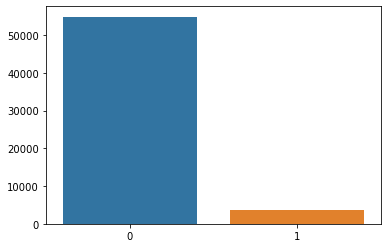

In [6]:
sns.barplot(x = [0, 1], y = [54844, 3784]) 

In [7]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  int64  
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  int64  
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  int64  
 8   model                             58592 non-null  int64  
 9   fuel_type                         58592 non-null  int64  
 10  max_torque                        58592 non-null  int64  
 11  max_power                         58592 non-null  int64  
 12  engi

In [9]:
df=df.drop(["policy_id"],axis=1)   

In [10]:
y = df['is_claim'] 
X = df.drop(['is_claim'], axis=1)

In [11]:
from sklearn.feature_selection import f_regression, chi2, SelectKBest 

In [12]:
selector=SelectKBest(score_func=chi2,k=20)
x_selected=selector.fit_transform(X,y) 

In [13]:
all_names=X.columns 
selected_mask=selector.get_support()  
selected_names=all_names[selected_mask]
print('Selected naems: ', selected_names) 

Selected naems:  Index(['policy_tenure', 'age_of_car', 'area_cluster', 'population_density',
       'segment', 'model', 'fuel_type', 'max_torque', 'max_power',
       'is_adjustable_steering', 'displacement', 'steering_type', 'length',
       'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_brake_assist', 'is_driver_seat_height_adjustable',
       'is_day_night_rear_view_mirror'],
      dtype='object')


In [14]:
features_20=['policy_tenure', 'age_of_car', 'area_cluster', 'population_density',
       'segment', 'model', 'fuel_type', 'max_torque', 'max_power',
       'is_adjustable_steering', 'displacement', 'steering_type', 'length',
       'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_brake_assist', 'is_driver_seat_height_adjustable',
       'is_day_night_rear_view_mirror']

Class=0, n=3748 (50.000%)
Class=1, n=3748 (50.000%)


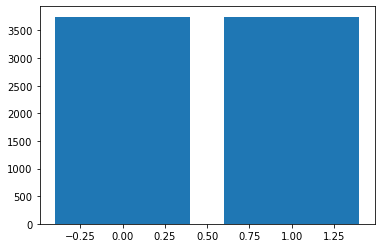

0       0
1       0
2       0
3       0
4       0
       ..
7491    1
7492    1
7493    1
7494    1
7495    1
Name: is_claim, Length: 7496, dtype: int64


In [15]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X[features_20], y) 
count_and_plot(y_resampled)
pd.Series(y_resampled).value_counts()
print(y_resampled) 

In [16]:
from sklearn.model_selection import train_test_split #train,test set 분리

train_x, test_x, train_y,  test_y = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)
pd.Series(train_y).value_counts() 

0    2634
1    2613
Name: is_claim, dtype: int64

In [17]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5247 entries, 2479 to 5157
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     5247 non-null   float64
 1   age_of_car                        5247 non-null   float64
 2   area_cluster                      5247 non-null   int64  
 3   population_density                5247 non-null   int64  
 4   segment                           5247 non-null   int64  
 5   model                             5247 non-null   int64  
 6   fuel_type                         5247 non-null   int64  
 7   max_torque                        5247 non-null   int64  
 8   max_power                         5247 non-null   int64  
 9   is_adjustable_steering            5247 non-null   int64  
 10  displacement                      5247 non-null   int64  
 11  steering_type                     5247 non-null   int64  
 12  len

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler  
from sklearn.preprocessing import RobustScaler
scaler=MinMaxScaler()  
# scaler=StandardScaler() 
# scaler=RobustScaler()
scaler.fit(train_x)
df_scaled=scaler.transform(train_x) 
df_scaled=pd.DataFrame(data=df_scaled, columns=train_x.columns) 

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report,precision_score,recall_score,f1_score  

# model random forest

In [20]:
# from sklearn.model_selection import GridSearchCV 
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# gs=GridSearchCV(RandomForestClassifier(random_state=42),grid,scoring='f1',cv=5,verbose=1)
# gs.fit(train_x,train_y)
# print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(gs.best_score_))
# print('GridSearchCV 최적 하이퍼파라미터: ', gs.best_params_)

In [21]:
from sklearn.ensemble import RandomForestClassifier  #randomforest 모델
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=5)
rf.fit(df_scaled,train_y)
rf_predicted = rf.predict(test_x)
rf_confusion_matrix=confusion_matrix(test_y,rf_predicted)  
rf_accuracy=accuracy_score(test_y, rf_predicted) 
rf_precision=precision_score(test_y,rf_predicted)
rf_recall=recall_score(test_y,rf_predicted) 
rf_f1score=f1_score(test_y, rf_predicted)  
print('accuracy: ',rf_accuracy)
print('precision: ',rf_precision)
print('recall: ' ,rf_recall) 
print("") 
print('f1_score: ',rf_f1score)   
print(rf_confusion_matrix)

accuracy:  0.516674077367719
precision:  0.541958041958042
recall:  0.27312775330396477

f1_score:  0.36321031048623315
[[852 262]
 [825 310]]


# model gradient boosting  

In [22]:
from sklearn.ensemble import GradientBoostingClassifier 
gb = GradientBoostingClassifier(n_estimators=300,max_features='log2',learning_rate=1.8,max_depth=1, random_state=99) 
gb.fit(df_scaled,train_y) 
gb_predicted=gb.predict(test_x)
gb_confusion_matrix=confusion_matrix(test_y,gb_predicted) 
gb_recall=recall_score(test_y,gb_predicted)
gb_precision=precision_score(test_y,gb_predicted) 
gb_f1score=f1_score(test_y, gb_predicted) 
gb_accuracy=accuracy_score(test_y,gb_predicted) 
print('gb_accuracy: ', gb_accuracy)
print('gb_precision: ',gb_precision)
print('gb_recall: ' ,gb_recall) 
print('gb_f1-score: ',gb_f1score)   
print("")
print(gb_confusion_matrix) 

gb_accuracy:  0.5593597154290796
gb_precision:  0.5676691729323309
gb_recall:  0.5321585903083701
gb_f1-score:  0.5493406093678945

[[654 460]
 [531 604]]


# model ada boost  

In [23]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=2000)
Ada.fit(df_scaled, train_y) 
ada_predicted=Ada.predict(test_x)
ada_f1score=f1_score(test_y, ada_predicted)  
ada_confusion_matrix=confusion_matrix(test_y,ada_predicted)  
ada_recall=recall_score(test_y,ada_predicted)
ada_precision=precision_score(test_y,ada_predicted) 
ada_accuracy=accuracy_score(test_y,ada_predicted) 
print('ada_accuracy: ', ada_accuracy)
print('ada_precision: ',ada_precision)
print('ada_recall: ' ,ada_recall) 
print('ada_f1-score: ',ada_f1score)   
print("")
print(ada_confusion_matrix) 

ada_accuracy:  0.5015562472209871
ada_precision:  0.5282258064516129
ada_recall:  0.11541850220264317
ada_f1-score:  0.18944323933477947

[[ 997  117]
 [1004  131]]


# model NN

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(64,32,16,8),learning_rate_init=0.0001,early_stopping=False, 
                    activation='relu', solver='lbfgs', max_iter=100, shuffle=True,verbose=True)
mlp.fit(df_scaled,train_y) 
NN_predicted = mlp.predict(test_x[features_20])
NN_confusion_matrix=confusion_matrix(test_y,NN_predicted) 
NN_recall=recall_score(test_y,NN_predicted)
NN_precision=precision_score(test_y,NN_predicted) 
NN_f1score=f1_score(test_y, NN_predicted) 
NN_accuracy=accuracy_score(test_y,NN_predicted) 
print('NN_accuracy: ', NN_accuracy)
print('NN_precision: ',NN_precision)
print('NN_recall: ' ,NN_recall) 
print('NN_f1-score: ',NN_f1score)   
print("")
print(NN_confusion_matrix) 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4097     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.95156D-01    |proj g|=  7.66589D-03

At iterate    1    f=  6.93123D-01    |proj g|=  2.06304D-02

At iterate    2    f=  6.91651D-01    |proj g|=  7.68984D-03

At iterate    3    f=  6.90104D-01    |proj g|=  8.51740D-03

At iterate    4    f=  6.89071D-01    |proj g|=  1.81054D-02

At iterate    5    f=  6.88323D-01    |proj g|=  1.17294D-02

At iterate    6    f=  6.86608D-01    |proj g|=  7.82699D-03

At iterate    7    f=  6.85473D-01    |proj g|=  1.67603D-02

At iterate    8    f=  6.82671D-01    |proj g|=  1.04134D-02

At iterate    9    f=  6.75881D-01    |proj g|=  1.47649D-02

At iterate   10    f=  6.74647D-01    |proj g|=  9.63340D-03

At iterate   11    f=  6.74035D-01    |proj g|=  8.31530D-03

At iterate   12    f=  6.73642D-01    |proj g|=  4.49878D-03

At iterate   13    f=  6.7

 This problem is unconstrained.



At iterate   18    f=  6.70722D-01    |proj g|=  4.70154D-03

At iterate   19    f=  6.70159D-01    |proj g|=  5.00919D-03

At iterate   20    f=  6.69520D-01    |proj g|=  4.71809D-03

At iterate   21    f=  6.69269D-01    |proj g|=  3.63843D-03

At iterate   22    f=  6.68993D-01    |proj g|=  2.34074D-03

At iterate   23    f=  6.68479D-01    |proj g|=  4.98077D-03

At iterate   24    f=  6.68250D-01    |proj g|=  4.37054D-03

At iterate   25    f=  6.67938D-01    |proj g|=  7.17622D-03

At iterate   26    f=  6.67756D-01    |proj g|=  7.58425D-03

At iterate   27    f=  6.67612D-01    |proj g|=  5.20546D-03

At iterate   28    f=  6.67483D-01    |proj g|=  4.54689D-03

At iterate   29    f=  6.67212D-01    |proj g|=  3.10787D-03

At iterate   30    f=  6.67044D-01    |proj g|=  1.90095D-03

At iterate   31    f=  6.66721D-01    |proj g|=  2.42576D-03

At iterate   32    f=  6.66380D-01    |proj g|=  6.02523D-03

At iterate   33    f=  6.66196D-01    |proj g|=  3.70192D-03

At iter

# model SVM 

In [25]:
# from sklearn import svm
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV 
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

# gs=GridSearchCV(svm.SVC(random_state=42,kernel='rbf'),param_grid,scoring='f1',cv=5,verbose=1)
# gs.fit(train_x,train_y)
# print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(gs.best_score_))
# print('GridSearchCV 최적 하이퍼파라미터: ', gs.best_params_)

In [26]:
# from sklearn import svm
# from sklearn.svm import SVC
# svc=svm.SVC(kernel='rbf',C=100, gamma=1) 
# svc.fit(df_scaled,train_y)
# svc_predicted=svc.predict(test_x)  
# svc_confusion_matrix=confusion_matrix(test_y,svc_predicted) 
# svc_accuracy=accuracy_score(test_y, svc_predicted)
# svc_recall=recall_score(test_y,svc_predicted)
# svc_precision=precision_score(test_y,svc_predicted) 
# svc_f1score=f1_score(test_y, svc_predicted) 
# print('svc_accuracy: ', svc_accuracy)
# print('svc_precision: ',svc_precision)
# print('svc_recall: ' ,svc_recall)
# print('svc_F1-score: ',svc_f1score)  
# print("")
# print(svc_confusion_matrix) 
# print(svc_f1score)  
# print(svc_confusion_matrix) 

# model DT

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 4) 
dt.fit(df_scaled,train_y)
dt_predicted = dt.predict(test_x[features_20])
dt_confusion_matrix=confusion_matrix(test_y,dt_predicted) 
dt_recall=recall_score(test_y,dt_predicted)
dt_precision=precision_score(test_y,dt_predicted) 
dt_f1score=f1_score(test_y, dt_predicted) 
dt_accuracy=accuracy_score(test_y,dt_predicted) 
print('dt_accuracy: ', dt_accuracy) 
print('dt_precision: ',dt_precision)
print('dt_recall: ' ,dt_recall) 
print('dt_f1-score: ',dt_f1score)   
print("") 
print(dt_confusion_matrix) 

dt_accuracy:  0.5606936416184971
dt_precision:  0.544357272178636
dt_recall:  0.7947136563876652
dt_f1-score:  0.6461318051575932

[[359 755]
 [233 902]]


In [28]:
# import seaborn as sns
# import numpy as np
# %matplotlib inline

# # feature importance 추출
# print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# # feature 별 feature importance 매핑
# for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
#     print('{0}: {1:.3f}'.format(name, value))
    
# # feature importance 시각화
# sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names) 

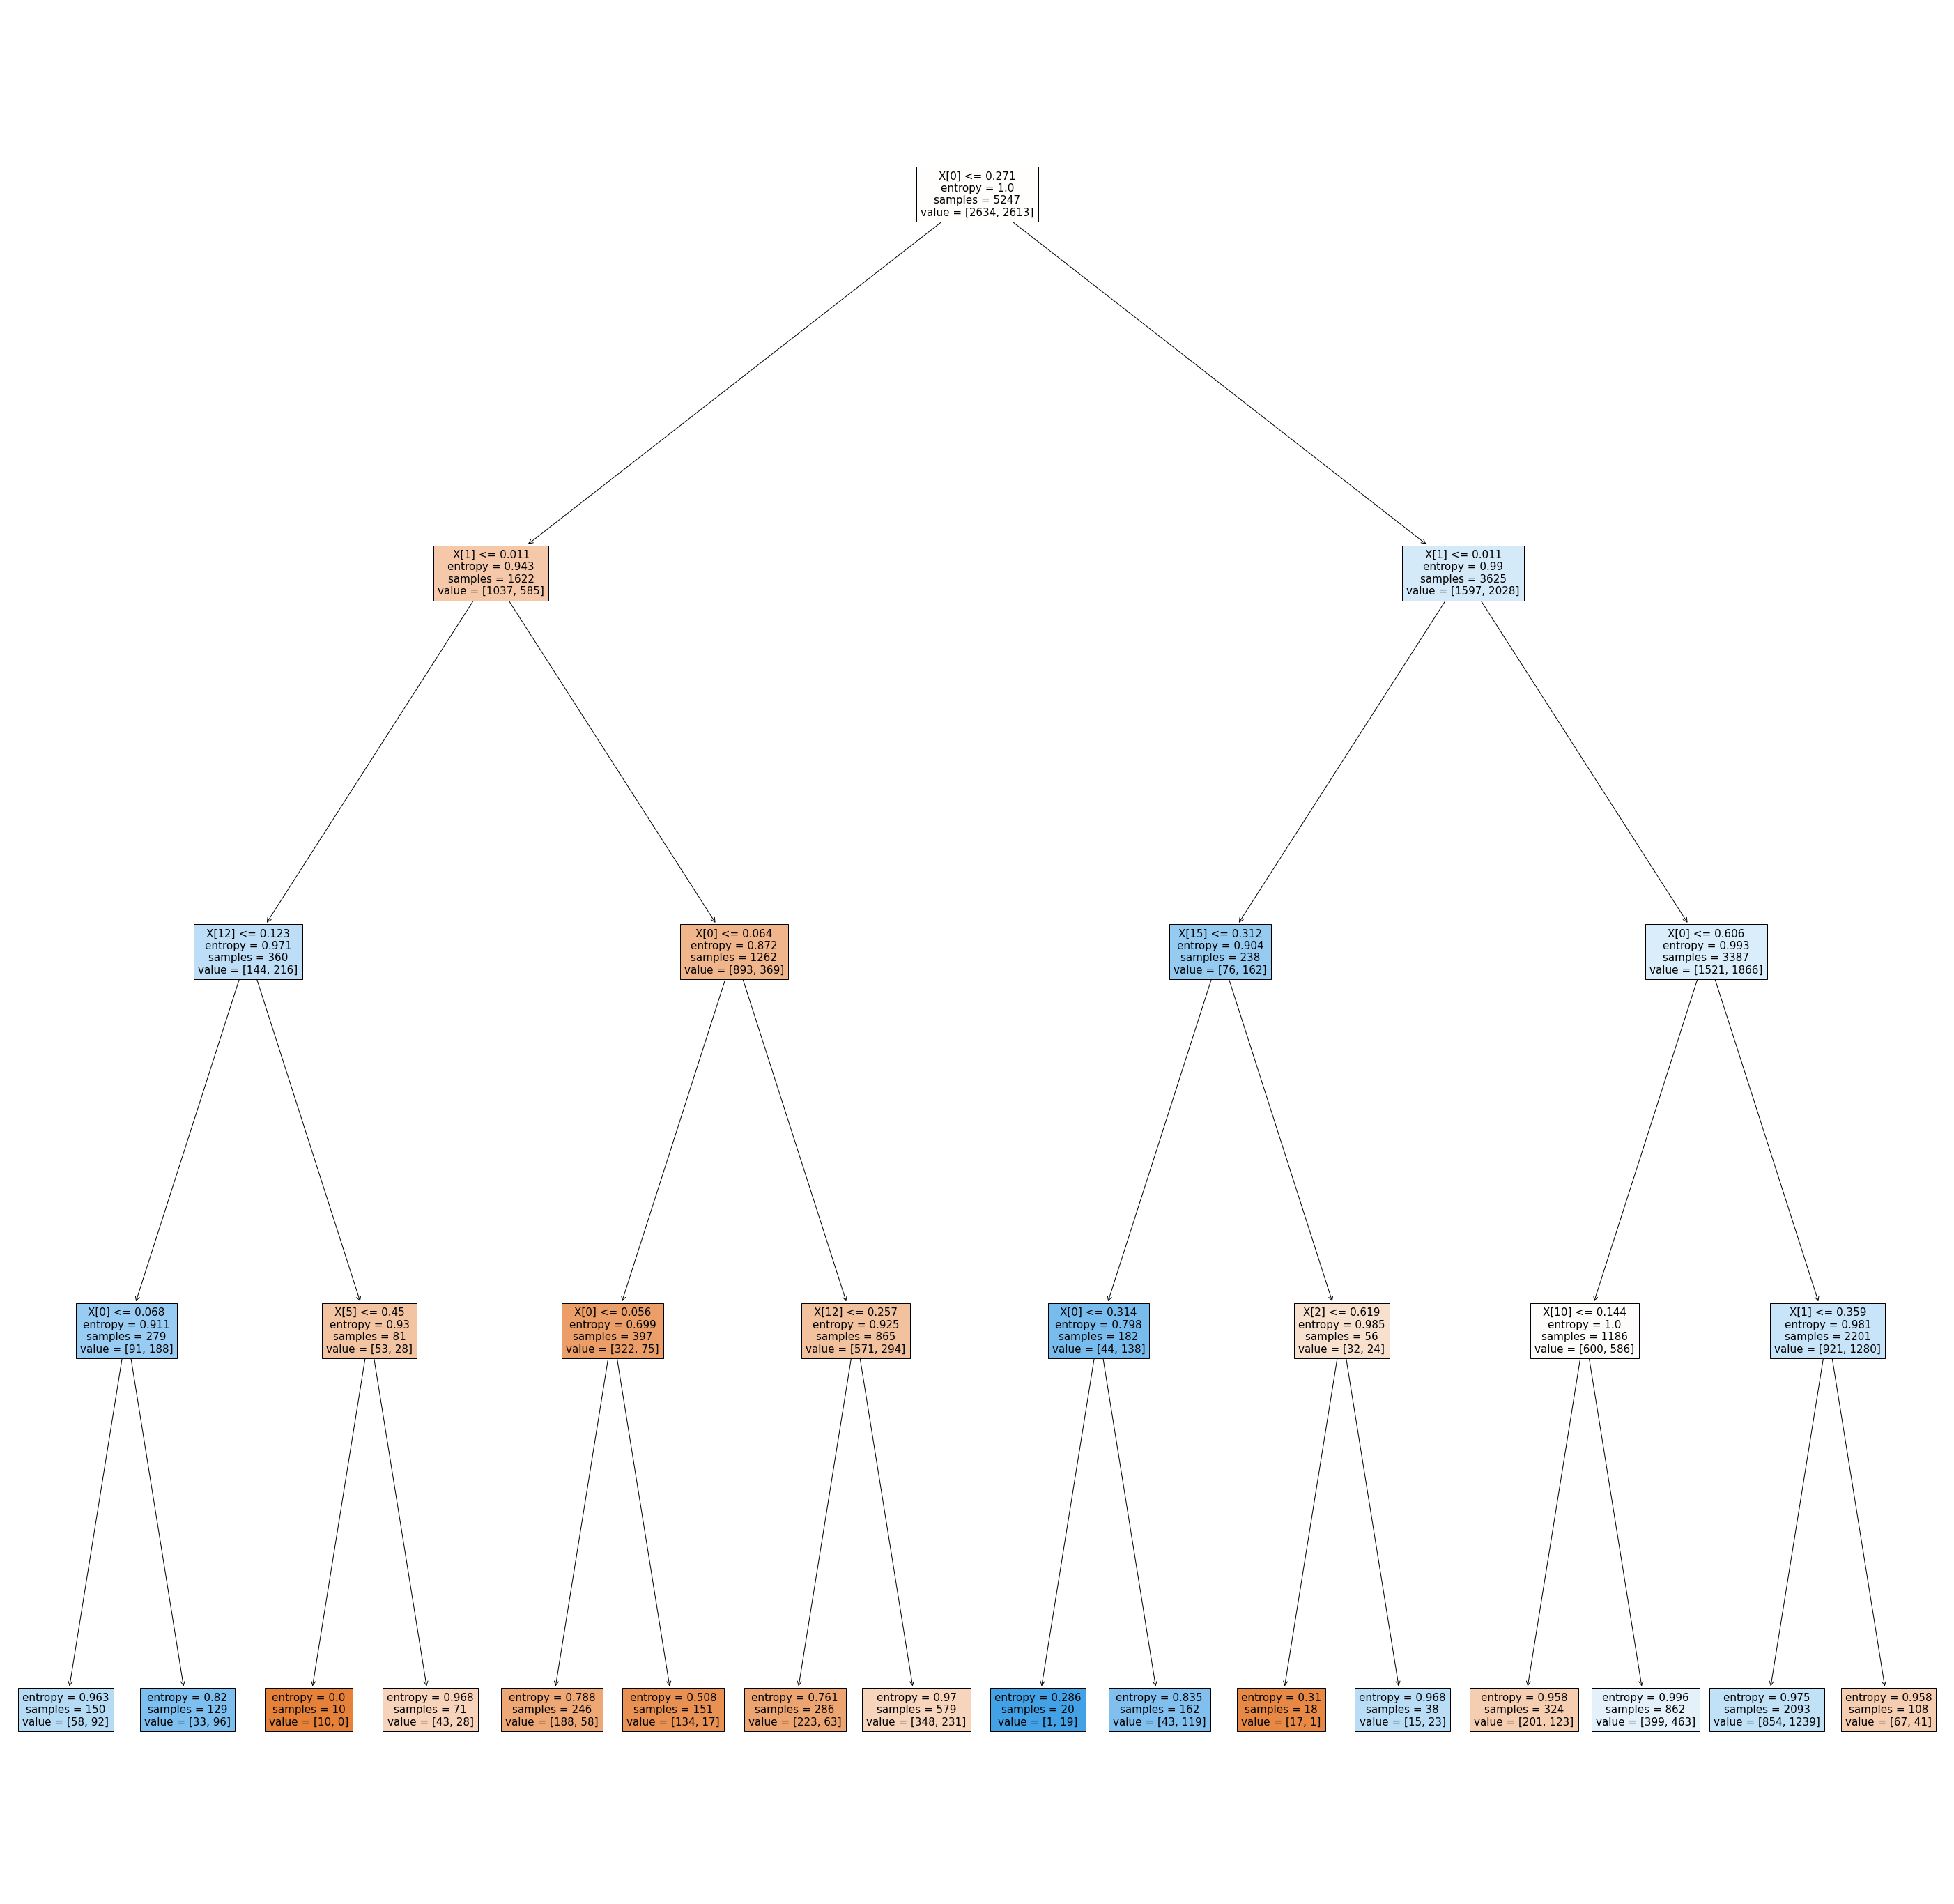

In [29]:
from sklearn import tree

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(dt,filled=True)
plt.savefig('treeunder.png') 

# XGBoost

In [30]:
xgb=XGBClassifier(random_state=0, n_estimators=300)
xgb.fit(df_scaled,train_y) 
xgb_predicted=xgb.predict(test_x[features_20])
xgb_confusion_matrix=confusion_matrix(test_y,xgb_predicted) 
xgb_recall=recall_score(test_y,xgb_predicted)
xgb_precision=precision_score(test_y,xgb_predicted) 
xgb_f1score=f1_score(test_y, xgb_predicted) 
xgb_accuracy=accuracy_score(test_y,xgb_predicted) 
print('xgb_accuracy: ', xgb_accuracy) 
print('xgb_precision: ',xgb_precision)
print('xgb_recall: ' ,xgb_recall) 
print('xgb_f1-score: ',xgb_f1score)   
print("") 
print(xgb_confusion_matrix) 

xgb_accuracy:  0.5566918630502445
xgb_precision:  0.5794930875576036
xgb_recall:  0.4431718061674009
xgb_f1-score:  0.5022466300549177

[[749 365]
 [632 503]]


<function matplotlib.pyplot.show(close=None, block=None)>

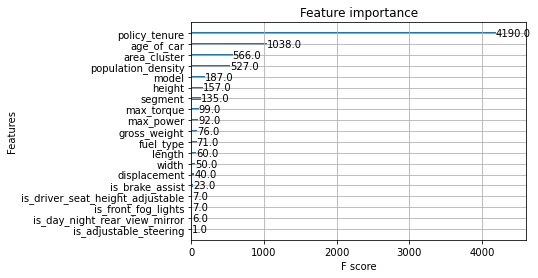

In [31]:
from xgboost import plot_importance
plot_importance(xgb)
plt.show

# LR

In [32]:
from sklearn.linear_model import LogisticRegression #logistic회귀분석
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(df_scaled, train_y)
lr_predicted = lr.predict(test_x[features_20])
lr_confusion_matrix = confusion_matrix(test_y, lr_predicted)
lr_accuracy = accuracy_score(test_y, lr_predicted)  
lr_recall=recall_score(test_y,lr_predicted)
lr_precision=precision_score(test_y,lr_predicted) 
lr_f1score=f1_score(test_y, lr_predicted)  
print('lr_accuracy: ', lr_accuracy)
print('lr_precision: ',lr_precision)
print('lr_recall: ' ,lr_recall)
print('lr_F1-score: ',lr_f1score)  
print("")
print(lr_confusion_matrix) 

lr_accuracy:  0.49399733214762115
lr_precision:  0.44
lr_recall:  0.009691629955947136
lr_F1-score:  0.018965517241379307

[[1100   14]
 [1124   11]]


# model knn 

In [33]:
knn = KNeighborsClassifier()
knn.fit(df_scaled, train_y)
knn_predicted = knn.predict(test_x)
knn_confusion_matrix = confusion_matrix(test_y, knn_predicted)
knn_accuracy= accuracy_score(test_y, knn_predicted)
knn_recall=recall_score(test_y,knn_predicted)
knn_precision=precision_score(test_y,knn_predicted) 
knn_f1score=f1_score(test_y, knn_predicted) 
print('knn_accuracy: ', knn_accuracy)
print('knn_precision: ',knn_precision)
print('knn_recall: ' ,knn_recall)
print('knn_F1-score: ',knn_f1score)  
print("") 
print(knn_confusion_matrix)

knn_accuracy:  0.5651400622498889
knn_precision:  0.5767350928641252
knn_recall:  0.5198237885462555
knn_F1-score:  0.5468025949953661

[[681 433]
 [545 590]]


In [39]:
model_list = [("Neural Network",mlp),("XGBoost",xgb),("Decision Tree",dt),("Logistic Regression",lr ),
              ("KNN",knn),("Gradient Boosting", gb),("Random Forest", rf),("Ada Boosting", gb)] 

for name, model in model_list:
    
    model.fit(df_scaled, train_y)
    
    pred_y= model.predict(test_x)
    
    score = f1_score(test_y, pred_y)
    print(f"The test f1_score  of {name} is {score}")
print("            [Select-K-Best,undersampling]           ") 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4097     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09391D-01    |proj g|=  8.96075D-02

At iterate    1    f=  6.91870D-01    |proj g|=  5.01224D-03

At iterate    2    f=  6.91732D-01    |proj g|=  1.82098D-02

At iterate    3    f=  6.90986D-01    |proj g|=  7.44171D-03

At iterate    4    f=  6.90012D-01    |proj g|=  6.62433D-03

At iterate    5    f=  6.89057D-01    |proj g|=  1.69622D-02

At iterate    6    f=  6.83157D-01    |proj g|=  2.13852D-02

At iterate    7    f=  6.80463D-01    |proj g|=  4.09827D-02

At iterate    8    f=  6.76876D-01    |proj g|=  1.93325D-02

At iterate    9    f=  6.76297D-01    |proj g|=  6.63883D-03

At iterate   10    f=  6.76091D-01    |proj g|=  7.12523D-03

At iterate   11    f=  6.75278D-01    |proj g|=  2.32454D-03

At iterate   12    f=  6.74469D-01    |proj g|=  7.03013D-03

At iterate   13    f=  6.7

 This problem is unconstrained.



At iterate   18    f=  6.70598D-01    |proj g|=  5.66071D-03

At iterate   19    f=  6.70234D-01    |proj g|=  3.13561D-03

At iterate   20    f=  6.69910D-01    |proj g|=  4.38602D-03

At iterate   21    f=  6.69624D-01    |proj g|=  2.98356D-03

At iterate   22    f=  6.69415D-01    |proj g|=  8.59832D-03

At iterate   23    f=  6.69240D-01    |proj g|=  2.84912D-03

At iterate   24    f=  6.69160D-01    |proj g|=  2.15329D-03

At iterate   25    f=  6.68898D-01    |proj g|=  5.36392D-03

At iterate   26    f=  6.68651D-01    |proj g|=  1.10435D-02

At iterate   27    f=  6.68587D-01    |proj g|=  1.21604D-02

At iterate   28    f=  6.68307D-01    |proj g|=  1.90002D-03

At iterate   29    f=  6.68253D-01    |proj g|=  1.61074D-03

At iterate   30    f=  6.68076D-01    |proj g|=  2.58071D-03

At iterate   31    f=  6.67911D-01    |proj g|=  3.80420D-03

At iterate   32    f=  6.67784D-01    |proj g|=  2.04925D-03

At iterate   33    f=  6.67680D-01    |proj g|=  1.52463D-03

At iter

# ROC Curve

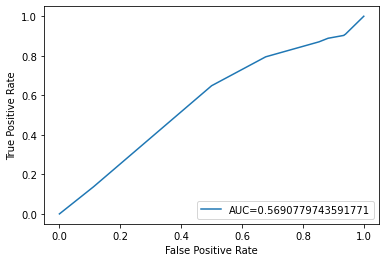

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score



dt.fit(df_scaled,train_y)
y_pred_proba =dt.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba)
auc = metrics.roc_auc_score(test_y, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
